In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
heart_data = pd.read_csv('heart failure.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heart_data = heart_data.rename({'DEATH_EVENT':'death'}, axis=1)

In [5]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# heart_data.to_csv('new.csv') to save your current csv file in your device


In [7]:
heart_data.death.value_counts()

0    203
1     96
Name: death, dtype: int64

<AxesSubplot:xlabel='death', ylabel='count'>

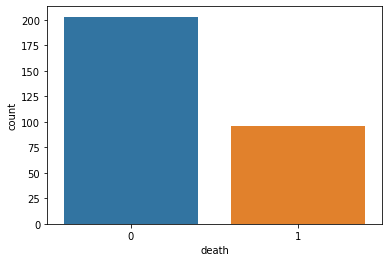

In [9]:
sns.countplot(x='death', data=heart_data)

<AxesSubplot:xlabel='count', ylabel='death'>

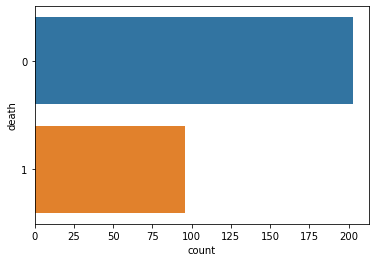

In [10]:
sns.countplot(y='death', data=heart_data)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

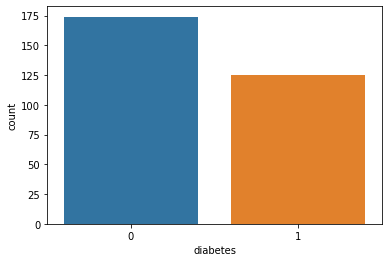

In [12]:
sns.countplot(x='diabetes', data = heart_data)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

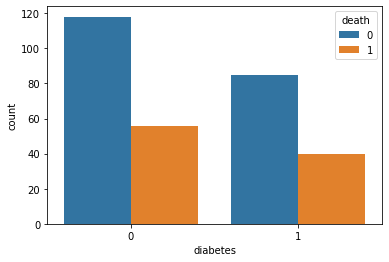

In [13]:
sns.countplot(x='diabetes', data = heart_data, hue='death') #respect to death

<AxesSubplot:xlabel='anaemia', ylabel='count'>

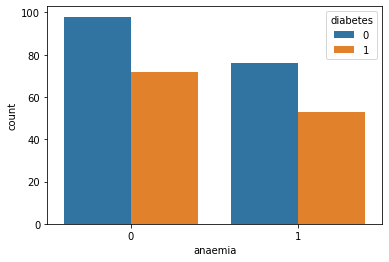

In [14]:
sns.countplot(x='anaemia', data=heart_data, hue='diabetes') # respect to diabetes

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = heart_data.drop('death', axis=1)
y = heart_data['death']

In [17]:
print(x)
print(y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.7,random_state=1)

# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc = DecisionTreeClassifier()

In [21]:
dtc.fit(xtrain,ytrain) #train the model with 70% data

DecisionTreeClassifier()

In [23]:
pred = dtc.predict(xtest) # prediction corresponding to ytest

In [24]:
pred # predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [25]:
import numpy as np
np.array(ytest) # Actual result

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

# Evaluate the ML model

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [27]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.85        64
           1       0.65      0.58      0.61        26

    accuracy                           0.79        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.78      0.79      0.78        90



In [29]:
test_confusion_matrix = confusion_matrix(ytest, pred)

In [30]:
test_confusion_matrix

array([[56,  8],
       [11, 15]], dtype=int64)

sns.heatmap(test_confusion_matrix, annot=True)

In [33]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [34]:
print(tp)
print(fn)

56
8


In [35]:
accuracy = (tp+tn)/ (tp+tn+fp+fn)

In [36]:
accuracy

0.7888888888888889

# ROC Curve

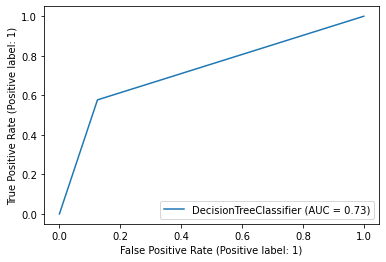

In [37]:
plot_roc_curve(dtc, xtest, ytest)

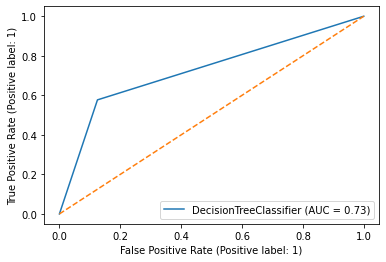

In [40]:
plot_roc_curve(dtc, xtest, ytest)
plt.plot([0,1], [0,1],linestyle='dashed')